<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2.0_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [3]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

assert X_train.shape == (60000, 28, 28)  # (N x 28 x 28)
assert X_test.shape == (10000, 28, 28)  # (N_test x 28 x 28)
assert y_train.shape == (60000,)  # (N)
assert y_test.shape == (10000,)  # (N_test)

11490434/11490434 [==============================] - 0s 0us/step


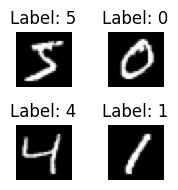

In [4]:
# Define the number of images to visualize in the grid
num_images_to_visualize = 4

# Create a 2x2 grid to display the images
fig, axes = plt.subplots(2, 2, figsize=(2, 2))

# Visualize the images
for i in range(num_images_to_visualize):
    # Get the row and column indices for the current image
    row = i // 2
    col = i % 2

    # Plot the image in the corresponding subplot
    axes[row, col].imshow(X_train[i], cmap='gray')
    axes[row, col].set_title(f"Label: {y_train[i]}")  # Display the corresponding label as the title
    axes[row, col].axis('off')  # Turn off axis labels

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Show the grid of images
plt.show()

## Part 2: Initialize the Model

In [6]:
def initialize_model():
  # architecture
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  # compile
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [7]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=8,
                    verbose=1)

Epoch 1/20
7500/7500 [==============================] - 33s 4ms/step - loss: 1.8282 - accuracy: 0.7211 - val_loss: 0.6363 - val_accuracy: 0.8201
Epoch 2/20
7500/7500 [==============================] - 28s 4ms/step - loss: 0.7431 - accuracy: 0.8031 - val_loss: 0.5245 - val_accuracy: 0.8961
Epoch 3/20
7500/7500 [==============================] - 29s 4ms/step - loss: 0.6573 - accuracy: 0.8321 - val_loss: 0.4728 - val_accuracy: 0.9131
Epoch 4/20
7500/7500 [==============================] - 28s 4ms/step - loss: 0.6367 - accuracy: 0.8406 - val_loss: 0.4900 - val_accuracy: 0.9034
Epoch 5/20
7500/7500 [==============================] - 28s 4ms/step - loss: 0.6092 - accuracy: 0.8467 - val_loss: 0.7972 - val_accuracy: 0.8884
Epoch 6/20
7500/7500 [==============================] - 29s 4ms/step - loss: 0.5930 - accuracy: 0.8503 - val_loss: 0.5857 - val_accuracy: 0.9060
Epoch 7/20
7500/7500 [==============================] - 27s 4ms/step - loss: 0.6031 - accuracy: 0.8487 - val_loss: 0.4762 - val_ac

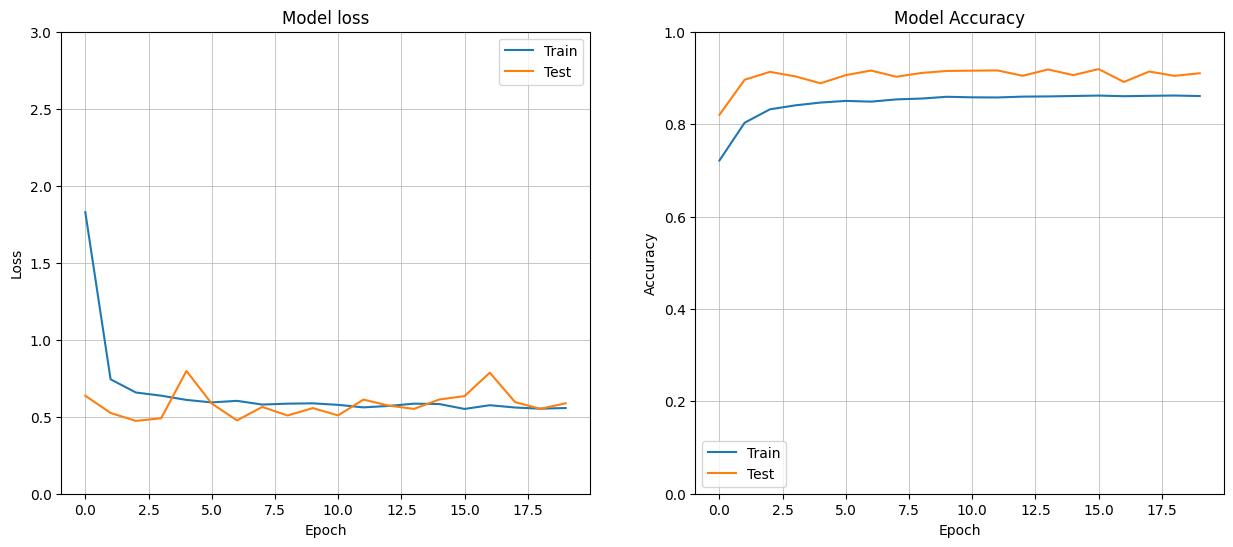

In [8]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(15,6))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(history, title=None)


# Part 3: Making Predictions

In [9]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [10]:
np.round(pred).flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [11]:
# Calculate the accuracy, compare it to evaluate() output
print('Manually calculated accuracy: ', np.mean(pred == y_test))
print('Evaluate output: ', model.evaluate(X_test, y_test))


<ipython-input-11-7ffc107813f7>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('Manually calculated accuracy: ', np.mean(pred == y_test))


Manually calculated accuracy:  0.0
313/313 [==============================] - 2s 4ms/step - loss: 0.5875 - accuracy: 0.9101
Evaluate output:  [0.5874531269073486, 0.910099983215332]


In [15]:
# Evaluation
results_train = model.evaluate(X_train, y_train, verbose = 0)
results_test = model.evaluate(X_test, y_test, verbose = 0)


# Looking back at what happened during the training phase
print(f'The accuracy on the testing set is {results_test[1]:.4f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.4f}.')

The accuracy on the testing set is 0.9101...
...whereas the accuracy on the training set is 0.9197.


### Part 4: Saving the Model

In [16]:
model.save('linearclassifier_mnist.h5')

!ls -lh

total 1.2M
-rw-r--r-- 1 root root 1.2M Jul 27 19:10 linearclassifier_mnist.h5
drwxr-xr-x 1 root root 4.0K Jul 26 13:33 sample_data


In [27]:
from keras.models import load_model

# Load the model & check if it still works
model = load_model('linearclassifier_mnist.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<keras.layers.reshaping.flatten.Flatten object at 0x783a499509d0>, <keras.layers.core.dense.Dense object at 0x783a49953f70>, <keras.layers.regularization.dropout.Dropout object at 0x783a49951330>, <keras.layers.core.dense.Dense object at 0x783a49951540>]
313/313 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.9101


[0.5874531269073486, 0.910099983215332]

In [29]:
from google.colab import files
files.download('linearclassifier_mnist.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>